<h1> Introduction to Classifiers </h1>

<h3> What is a classification problem </h3>

According to Wikipedia:<br>
Classification is a process related to categorization, the process in which ideas and objects are recognized, differentiated, and understood.
<p> In Machine Learning, a classification problems is the categorization of data into two or more classes.

# Introduction to Decision Tree Based Modelling

<h2> But what is a decision tree? </h2>

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. Decision Tree is a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

![Simple Decision Tree](images/dt.jpg)

Decision tree is the most easy to understand concept of Machine Learning and yet so powerful that we humans use it in day to day life.

Some advantages of decision trees are:
<ul>
    <li> Simple to understand and to interpret. Trees can be visualised. </li>
    <li> Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. </li>
    <li> The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree. </li>
    <li> Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. </li>
    <li> Able to handle multi-output problems. </li>
    <li> Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret. </li>
    <li> Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model. </li>
    <li> Performs well even if its assumptions are somewhat violated by the true model from which the data were generated. </li>
</ul>

The disadvantages of decision trees include:
<ul>
    <li> Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. </li>
    <li> Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble. </li>
    <li> The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement. </li>
    <li> There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems. </li>
    <li> Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. </li>
</ul>

<h2> Terminologies </h2>

<ol>
    <li> <b> Split: </b> A split is the process of making a decision and creating two or more sub-nodes </li>
    <li> <b> Root Node: </b> The first/base node in the tree where the first split is made </li>
    <li> <b> Leaf: </b> The last node in the tree that doesn't split further </li>
    <li> <b> Branch: </b> A represents one of the possible alternatives of the decision at a node </li> 
    <li> <b> Pruning: </b> Removal of branches and nodes from a tree </li>
    <li> <b> Parent and Child Node: </b> A node which is divided into sub nodes is called parent node and the sub nodes are called the child of the parent node </li>
</ol>

<h2> How do Decision Tree work? </h2>

<ol>
    <li> Select the best attribute for the split </li>
    <li> Make that attribute a decision node and break the dataset into smaller subsets </li>
    <li> Repeat the above steps recursively for each child until all the tuples belong to the same valu or there are no more remaining data points. </li>
</ol>

![Decision Tree Working](images/dt-working.png)

# Decision Tree Classifier

A Decision Tree classifier is a supervised learning technique to classify data into two or more categories by using decision tree with multiple nodes.

In [1]:
%load_ext autoreload

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

[Iris Dataset](https://archive.ics.uci.edu/ml/datasets/Iris/)

![Flower](images/Petal-sepal.jpg)

In [4]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
y_train

array([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9555555555555556

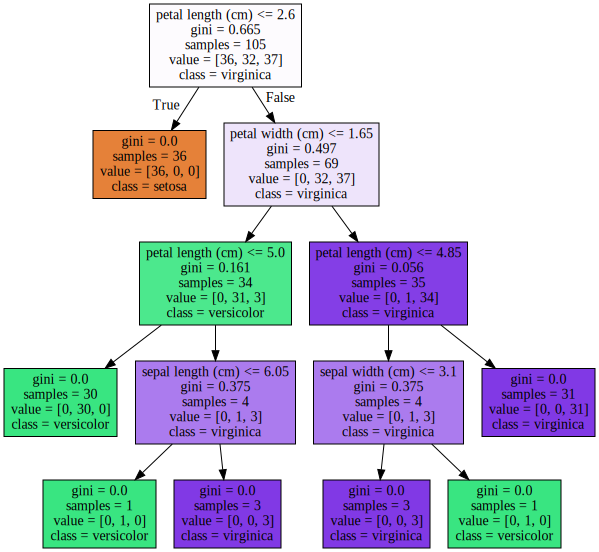

In [10]:
labels = iris.feature_names
graph = Source(export_graphviz(dtc, out_file=None
   , feature_names=labels, class_names=iris.target_names
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## Implementing Decision Tree Classifier for titanic dataset

In [11]:
import pandas as pd
df_train = pd.read_csv('../data/titanic/train.csv')
df_test = pd.read_csv('../data/titanic/test.csv')

In [12]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df_train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


For keeping things simple, we will remove <b>Name</b>, <b>Ticket</b> features from the dataset as they will require more feature engineering to extract meaningful information.

In [14]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
df_train.isnull().sum().sort_index()/len(df_train), df_test.isnull().sum().sort_index()/len(df_test)

(Age            0.198653
 Embarked       0.002245
 Fare           0.000000
 Parch          0.000000
 PassengerId    0.000000
 Pclass         0.000000
 Sex            0.000000
 SibSp          0.000000
 Survived       0.000000
 dtype: float64, Age            0.205742
 Embarked       0.000000
 Fare           0.002392
 Parch          0.000000
 PassengerId    0.000000
 Pclass         0.000000
 Sex            0.000000
 SibSp          0.000000
 dtype: float64)

<h3> Combine Both train and test before filling null values </h3>

In [16]:
X_train = df_train.drop('Survived', axis=1)

In [17]:
X_train.shape, df_test.shape

((891, 8), (418, 8))

In [18]:
df = pd.concat([X_train, df_test])

In [19]:
df.isnull().sum().sort_index()/len(df)

Age            0.200917
Embarked       0.001528
Fare           0.000764
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
dtype: float64

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [21]:
X = df.iloc[:891].copy()
df_test = df.iloc[891:].copy()
X.shape, df_test.shape

((891, 8), (418, 8))

In [22]:
def preprocess_df(df, embarked_cat_order):
    df['Sex'] = df['Sex'].astype('category').cat.as_ordered()
    df['Sex'] = df['Sex'].cat.set_categories(['male', 'female'], ordered=True)
    df['Sex'] = df['Sex'].cat.codes
    
    df['Embarked'] = df['Embarked'].astype('category').cat.as_ordered()
    df['Embarked'] = df['Embarked'].cat.set_categories(embarked_cat_order, ordered=True)
    df['Embarked'] = df['Embarked'].cat.codes

In [23]:
embarked_cat_order = X['Embarked'].unique()
embarked_cat_order

array(['S', 'C', 'Q'], dtype=object)

In [24]:
preprocess_df(X, embarked_cat_order)

In [25]:
y = df_train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_val, y_val), dtc.score(X_train, y_train)

(0.7761194029850746, 1.0)

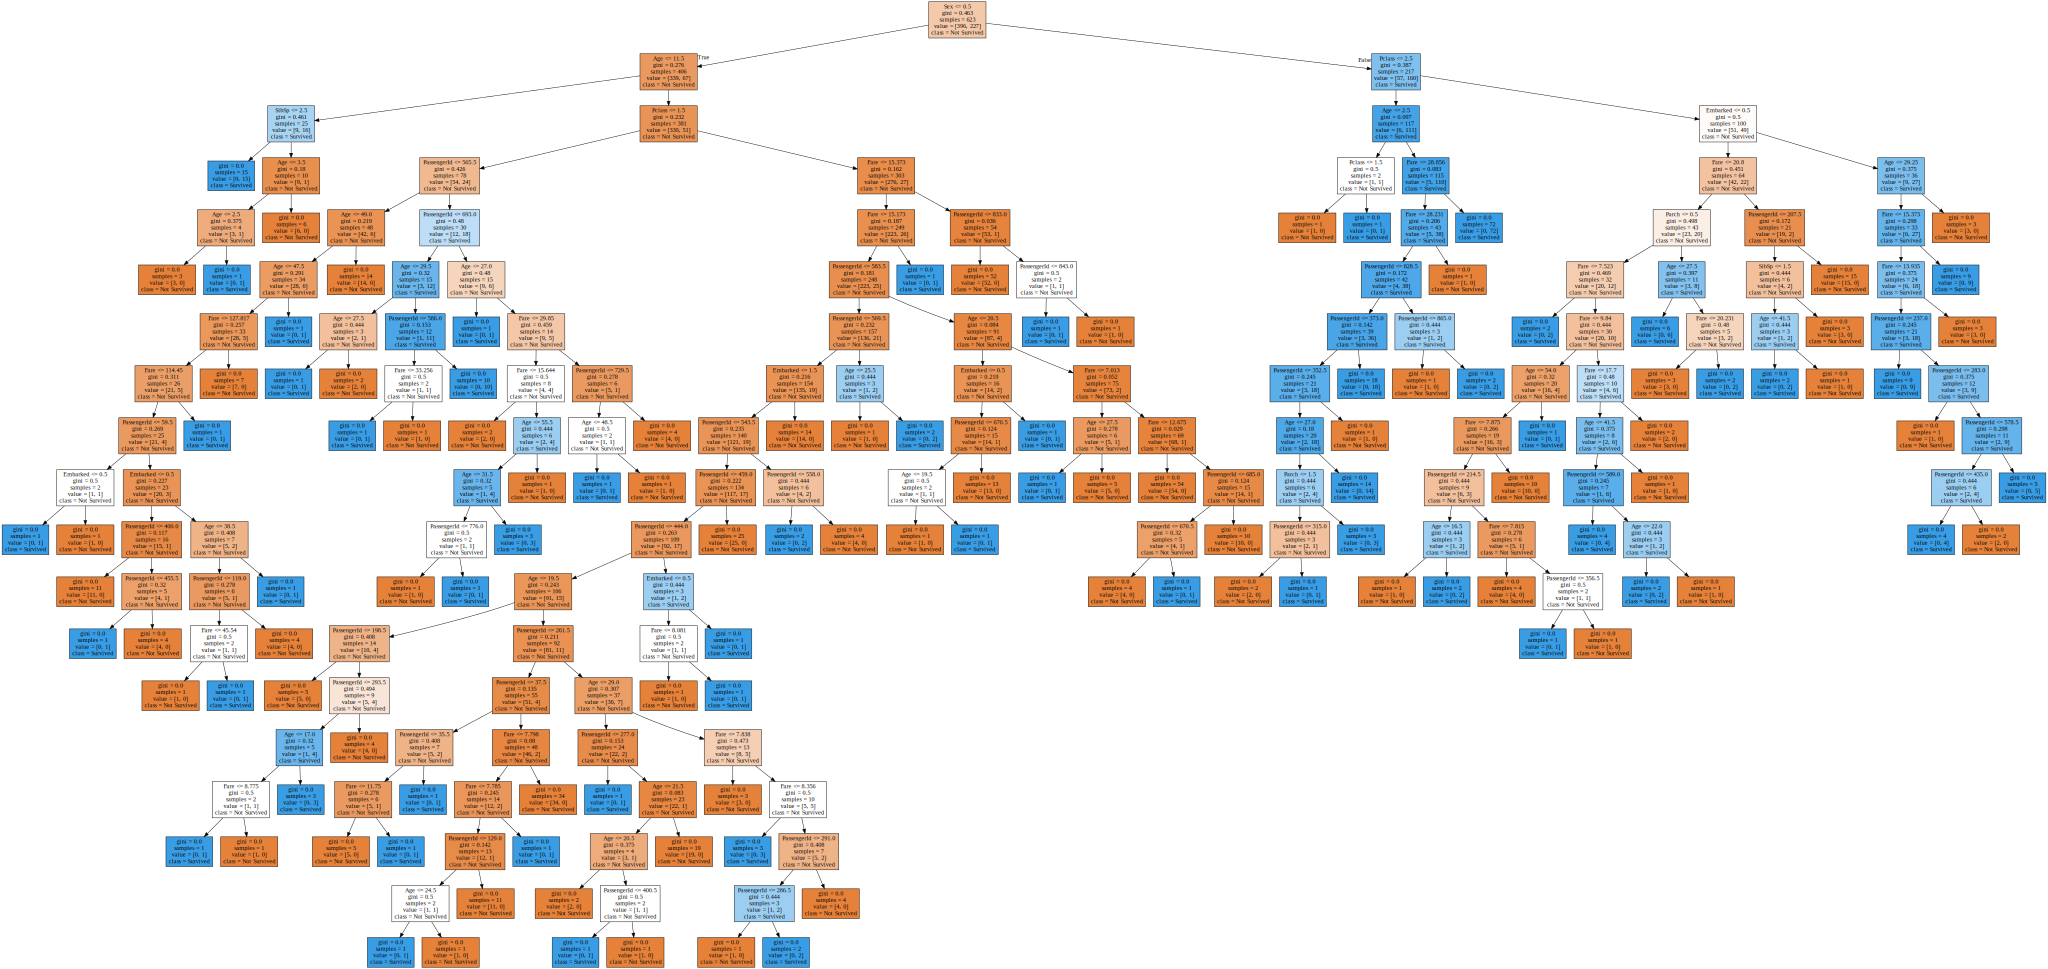

In [27]:
graph = Source(export_graphviz(dtc, out_file=None
   , feature_names=X_train.columns, class_names=['Not Survived', 'Survived']
   , filled = True))

# svg_bytes = graph.pipe(format='svg')
# with open('dtree_pipe_2.svg','wb') as f:
#     f.write(svg_bytes)
display(SVG(graph.pipe(format='svg')))

## Parameter tuning for improving accuracy

Documentation for [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br>
As present in the documentation, we have a lot of variables that can be changed to change how the decision tree is made.

<b>max_depth</b> indicates how deep the tree can be. The deeper the tree, the more splits it has and thus it captures more information about the data

In [28]:
from matplotlib.legend_handler import HandlerLine2D

Text(0.5, 0, 'max_depth')

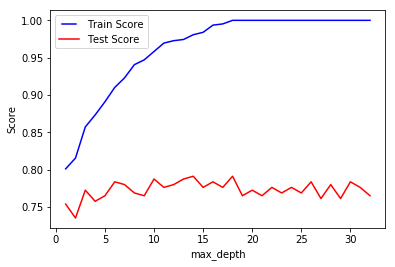

In [29]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(X_train, y_train)
    train_results.append(dtc.score(X_train, y_train))
    test_results.append(dtc.score(X_val, y_val))

line1, = plt.plot(max_depths, train_results, 'b', label="Train Score")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depth')

<b>min_samples_split</b> represents the minimum number of samples required for making a split. It can vary from one data point to the full dataset.

Text(0.5, 0, 'min_samples_split')

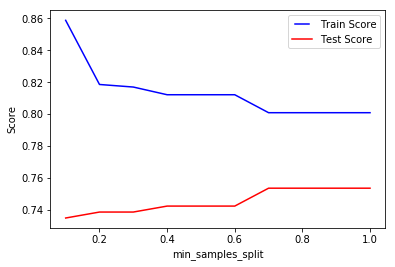

In [30]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dtc = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dtc.fit(X_train, y_train)
    train_results.append(dtc.score(X_train, y_train))
    test_results.append(dtc.score(X_val, y_val))

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_split')

<b>min_samples_leaf</b> is the minimum number of samples required to be at a leaf node.

Text(0.5, 0, 'min_samples_leaf')

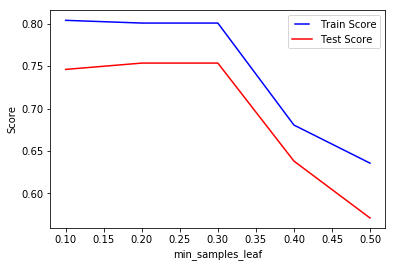

In [31]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dtc = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dtc.fit(X_train, y_train)
    train_results.append(dtc.score(X_train, y_train))
    test_results.append(dtc.score(X_val, y_val))

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leaf')

<b>max_features</b> is used to mention the number of features to consider when looking for best split.

Text(0.5, 0, 'max_features')

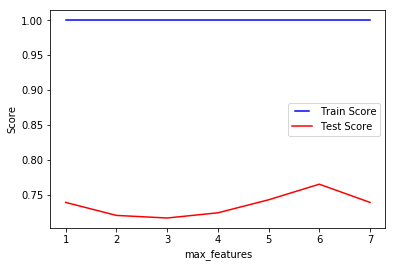

In [32]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dtc = DecisionTreeClassifier(max_features=max_feature)
    dtc.fit(X_train, y_train)
    train_results.append(dtc.score(X_train, y_train))
    test_results.append(dtc.score(X_val, y_val))

line1, = plt.plot(max_features, train_results, 'b', label="Train Score")
line2, = plt.plot(max_features, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')

In [33]:
preprocess_df(df_test, embarked_cat_order)

In [34]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model.score(X_val, y_val)

0.7686567164179104

In [35]:
y_predict = model.predict(df_test)

In [36]:
with open('out.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for pid, val in zip(df_test['PassengerId'].values, y_predict):
        f.write(f'{pid},{val}\n')

Kaggle Titanic Dataset [Submission](https://www.kaggle.com/c/titanic/submit)

In [37]:
model = DecisionTreeClassifier(max_depth=13, min_samples_split=0.8, max_features=2, min_samples_leaf=0.3).fit(X_train, y_train)
model.score(X_val, y_val)

0.753731343283582

<h2> Ensembling </h2>

[Cambridge University Dictionary](https://dictionary.cambridge.org/dictionary/english/ensemble) defines ensemble as a group of things. Decision Trees Ensambling invloves a group of decision trees that are not good predictors individually but have high accuracy when used in a group. To create an ensemble we use bagging or boosting techniques.

<h3> Bagging </h3>

Bagging is a technique of combining results of multiple classifiers modeled on different sub-datasets. The goal of bagging is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

# Random Forest

Random Forest builds over bagging where along with random subset of data, it also takes random subset of features instead of using all the features. Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

![Random Forest or Neural Network](images/rf.jpg)

<h3> How do Random Forest Work? </h3>

<ol>
    <li> Let's assume there are N data points and M features in the training dataset. A subset of N data points <b>n</b> and a subset of M features <b>m</b> is taken randomly without replacement.</li>
    <li> Whichever feature provides the best split is used to split the node </li>
    <li> Steps 1 and 2 are used to grow the tree to the leaf nodes </li>
    <li> Steps 3 is repeated to create a forest of trees and the final prediction is given based on aggegation of predictions from individual trees </li>
</ol>    

<h3> Advantages of Random Forest </h3>
<ol>
    <li> This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts. </li>
    <li>One of benefits of Random forest which excites me most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs <b> Importance of variable </b>, which can be a very handy feature (on some random data set). </li>
    <li> It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing. </li>
    <li> It has methods for balancing errors in data sets where classes are imbalanced. </li>
    <li> The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection. </li>
    <li> Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third of the data is not used for training and can be used to testing. These are called the <b> out of bag </b> samples. Error estimated on these out of bag samples is known as out of bag error. Study of error estimates by Out of bag, gives evidence to show that the out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set. </li>
</ol>

<h3> Disadvantages of Random Forest </h3>
<ol> 
    <li> It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy. </li>
    <li> Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds! </li>
</ol>

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_val, y_val)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.753731343283582

In [40]:
y_predict = model.predict(df_test)
with open('out.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for pid, val in zip(df_test['PassengerId'].values, y_predict):
        f.write(f'{pid},{val}\n')

## Parameter tuning for improving accuracy

<b>n_estimators</b> The number of trees in the forest.

In [41]:
np.linspace(1, 100, 10, endpoint=True).astype('int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

Text(0.5, 0, 'n_estimators')

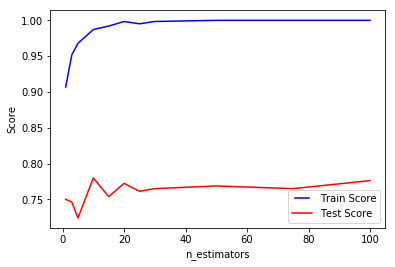

In [42]:
n_estimators = [1, 3, 5, 10, 15, 20, 25, 30, 50, 75, 100]
train_results = []
test_results = []
for n_estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_val, y_val))

line1, = plt.plot(n_estimators, train_results, 'b', label="Train Score")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')

<b> min_samples_leaf </b> The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
<ul> 
    <li> If int, then consider min_samples_leaf as the minimum number. </li>
    <li> If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node. </li>
</ul>

Text(0.5, 0, 'min_samples_leaf')

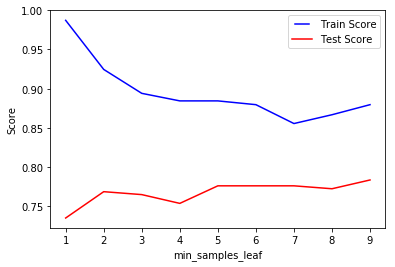

In [43]:
min_samples_leaf = list(range(1, 10))
train_results = []
test_results = []
for min_sample_leaf in min_samples_leaf:
    model = RandomForestClassifier(n_estimators=10, min_samples_leaf=min_sample_leaf)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_val, y_val))

line1, = plt.plot(min_samples_leaf, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leaf, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leaf')

<b> max_features </b> The number of features to consider when looking for the best split:
<ol>
    <li> If int, then consider max_features features at each split. </li>
    <li> If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split. </li>
    <li> If “auto”, then max_features=sqrt(n_features). </li>
    <li> If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). </li>
    <li> If “log2”, then max_features=log2(n_features). </li>
    <li> If None, then max_features=n_features.</li>
</ol>

Text(0.5, 0, 'max_features')

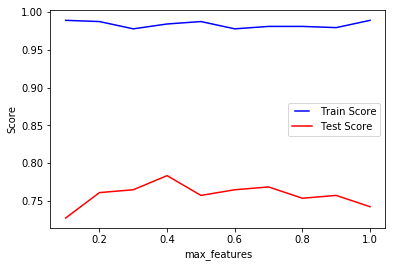

In [44]:
max_features = np.linspace(0.1, 1, 10, endpoint=True)
train_results = []
test_results = []
for max_feature in max_features:
    model = RandomForestClassifier(n_estimators=10, max_features=max_feature)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_val, y_val))

line1, = plt.plot(max_features, train_results, 'b', label="Train Score")
line2, = plt.plot(max_features, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')

In [45]:
model = RandomForestClassifier(n_estimators=20, min_samples_leaf=4, max_features=0.5)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_val, y_val)

(0.9101123595505618, 0.7686567164179104)

In [46]:
y_predict = model.predict(df_test)
with open('out.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for pid, val in zip(df_test['PassengerId'].values, y_predict):
        f.write(f'{pid},{val}\n')

In [47]:
model = RandomForestClassifier(n_estimators=80, min_samples_leaf=4, max_features=0.5)
model.fit(X, y)
model.score(X_train, y_train), model.score(X_val, y_val)

(0.9149277688603531, 0.8843283582089553)

In [48]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump([X, y, df_test], f)

# K Nearest Neighbors Classifier

A very good visualisation from Stanford is available [here](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_val, y_val)

(0.7512038523274478, 0.5970149253731343)

Text(0.5, 0, 'n_neighbors')

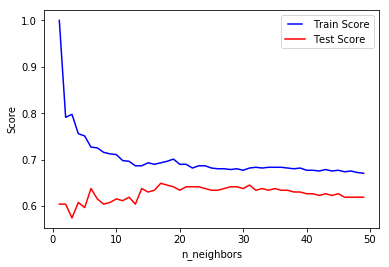

In [51]:
n_neighbors = list(range(1, 50))
train_results = []
test_results = []
for n_neighbor in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n_neighbor)
    model.fit(X_train, y_train)
    train_results.append(model.score(X_train, y_train))
    test_results.append(model.score(X_val, y_val))

line1, = plt.plot(n_neighbors, train_results, 'b', label="Train Score")
line2, = plt.plot(n_neighbors, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_neighbors')

In [52]:
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X, y)
model.score(X_train, y_train), model.score(X_val, y_val)

(0.6982343499197432, 0.6529850746268657)

In [53]:
y_predict = model.predict(df_test)
with open('out.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for pid, val in zip(df_test['PassengerId'].values, y_predict):
        f.write(f'{pid},{val}\n')

# Support Vector Classifier

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_val, y_val)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9951845906902087, 0.5783582089552238)

Otto Group Product Classification Challenge on [kaggle](https://www.kaggle.com/c/otto-group-product-classification-challenge)